# CDNow Analysis

CDNow网站用户消费数据分析

---

Created on 2019-05-27

Update on 2019-05-27

Author: Jiacheng

Github: https://github.com/Jiachengciel/Data_Analysis

---

## 一. 环境配置

In [43]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib notebook
sns.set(style='white', context='notebook', 
        palette='deep', rc={'figure.figsize':(5,5)})

---

## 二. 数据处理

### 2.1 数据导入

In [6]:
names = ['ID', 'Order_Date', 'Quantity', 'Amount']
Data = pd.read_csv('CDNow.txt', names=names, sep='\s+', header=None)
Data.Order_Date = pd.to_datetime(Data.Order_Date.astype(str))
print("订单总额: ", len(Data))

订单总额:  69659


### 2.2 部分数据查看

In [3]:
Data[:10]

,ID,Order_Date,Quantity,Amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


### 2.3 检查数据缺失

In [4]:
Data.isnull().any().describe()

count         4
unique        1
top       False
freq          4
dtype: object

### 2.4 数据整合

In [ ]:
Data = pd.DataFrame(Data.groupby(['ID', 'Order_Date']).sum())
Data = elog.reset_index()
print("Total number of order: ", len(Data))
Data[:10]

---

## 三. 商品销售分析

主要分析商品数量、金额等方面

### 3.1 静态分析

从各订单购买数量和各订单购买金额分析

* ### 3.1.1各订单购买数量 

In [5]:
Data.Quantity.describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: Quantity, dtype: float64

分析：

订单总计`69659`个

每笔订单平均购买`2.4`个产品，标准差为`2.33`

每笔订单最少购买`1`个产品， 最多购买`99`个产品

<IPython.core.display.Javascript object>


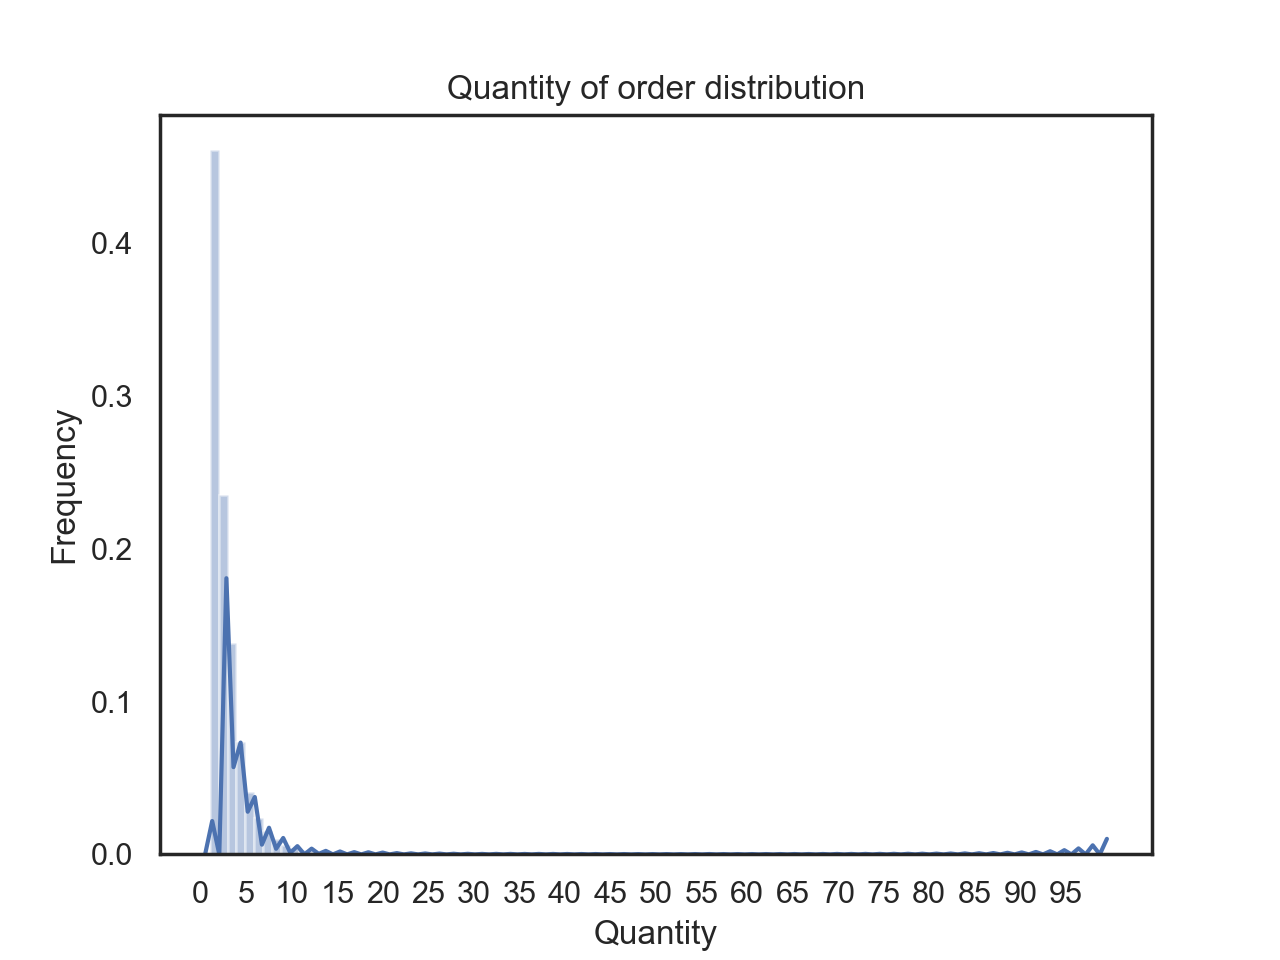

In [37]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Quantity of order distribution")
plt.xlabel("Quantity of order")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 100, 5))
sns.distplot(Data.Quantity, bins=100, kde=True)
plt.show()

分析： 

各订单数量`总体较小`，大部分订单数量`<5`

* ### 3.1.2 各订单购买金额分析

In [24]:
Data.Amount.describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: Amount, dtype: float64

分析：

每笔订单平均支付`35.89$`， 标准差为`36.28`, 50%订单`<25.98$`

每笔订单购买金额最少为`0`， 最高为`1286.01`

因此，订单存在`取消`的情况

<IPython.core.display.Javascript object>


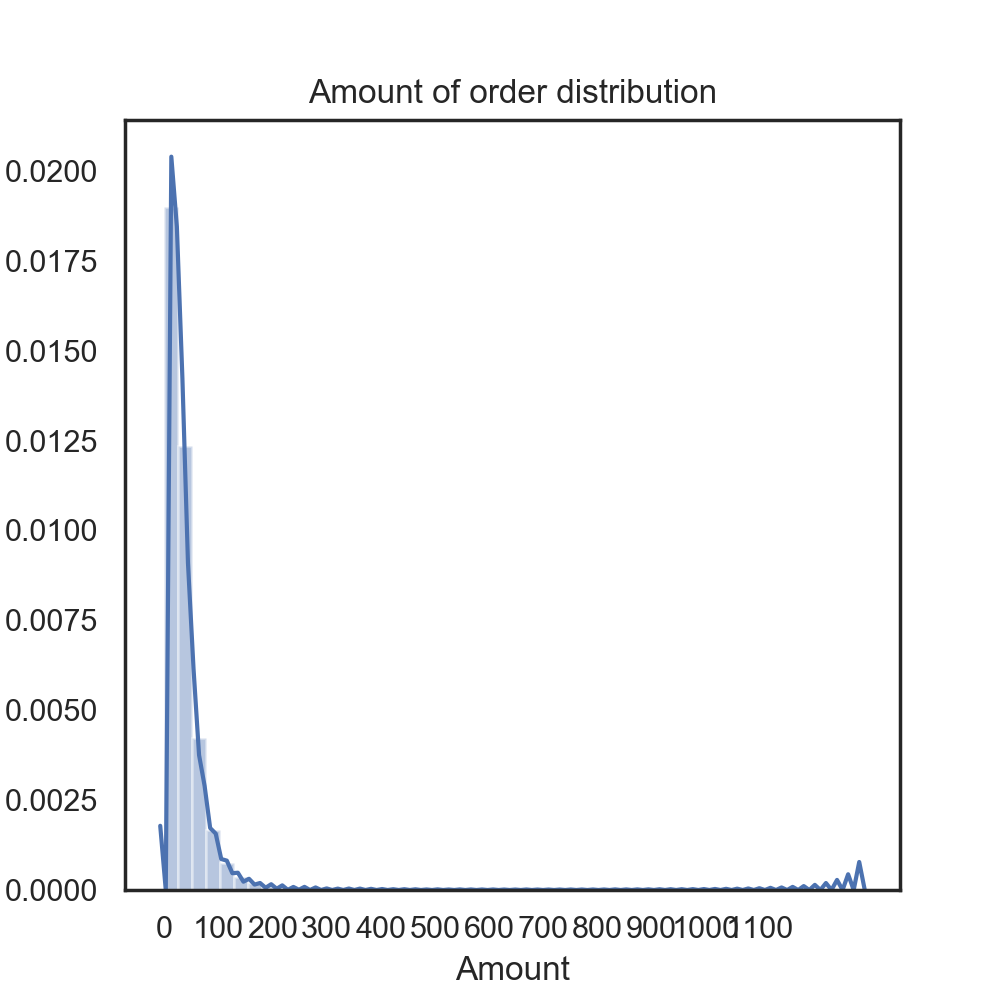

In [44]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Amount of order distribution")
plt.xlabel("Amount of order")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 1200, 100))
sns.distplot(Data.Amount, kde=True)
plt.show()

分析：

各订单购买金额较为集中于`0～100$`范围内

---

### 3.2 动态分析 

主要从订单的数量和购买金额趋势进行分析，同时检测异常值

### 3.2.1 订单数量趋势分析

In [45]:
# 数据整合
df_quantity = pd.DataFrame(Data.groupby(['Order_Date'])['Quantity'].sum())
df_quantity = df_quantity.reset_index()
df_quantity[:10]


,Order_Date,Quantity
0,1997-01-01,494
1,1997-01-02,530
2,1997-01-03,495
3,1997-01-04,404
4,1997-01-05,590
5,1997-01-06,620
6,1997-01-07,494
7,1997-01-08,515
8,1997-01-09,482
9,1997-01-10,533


<IPython.core.display.Javascript object>


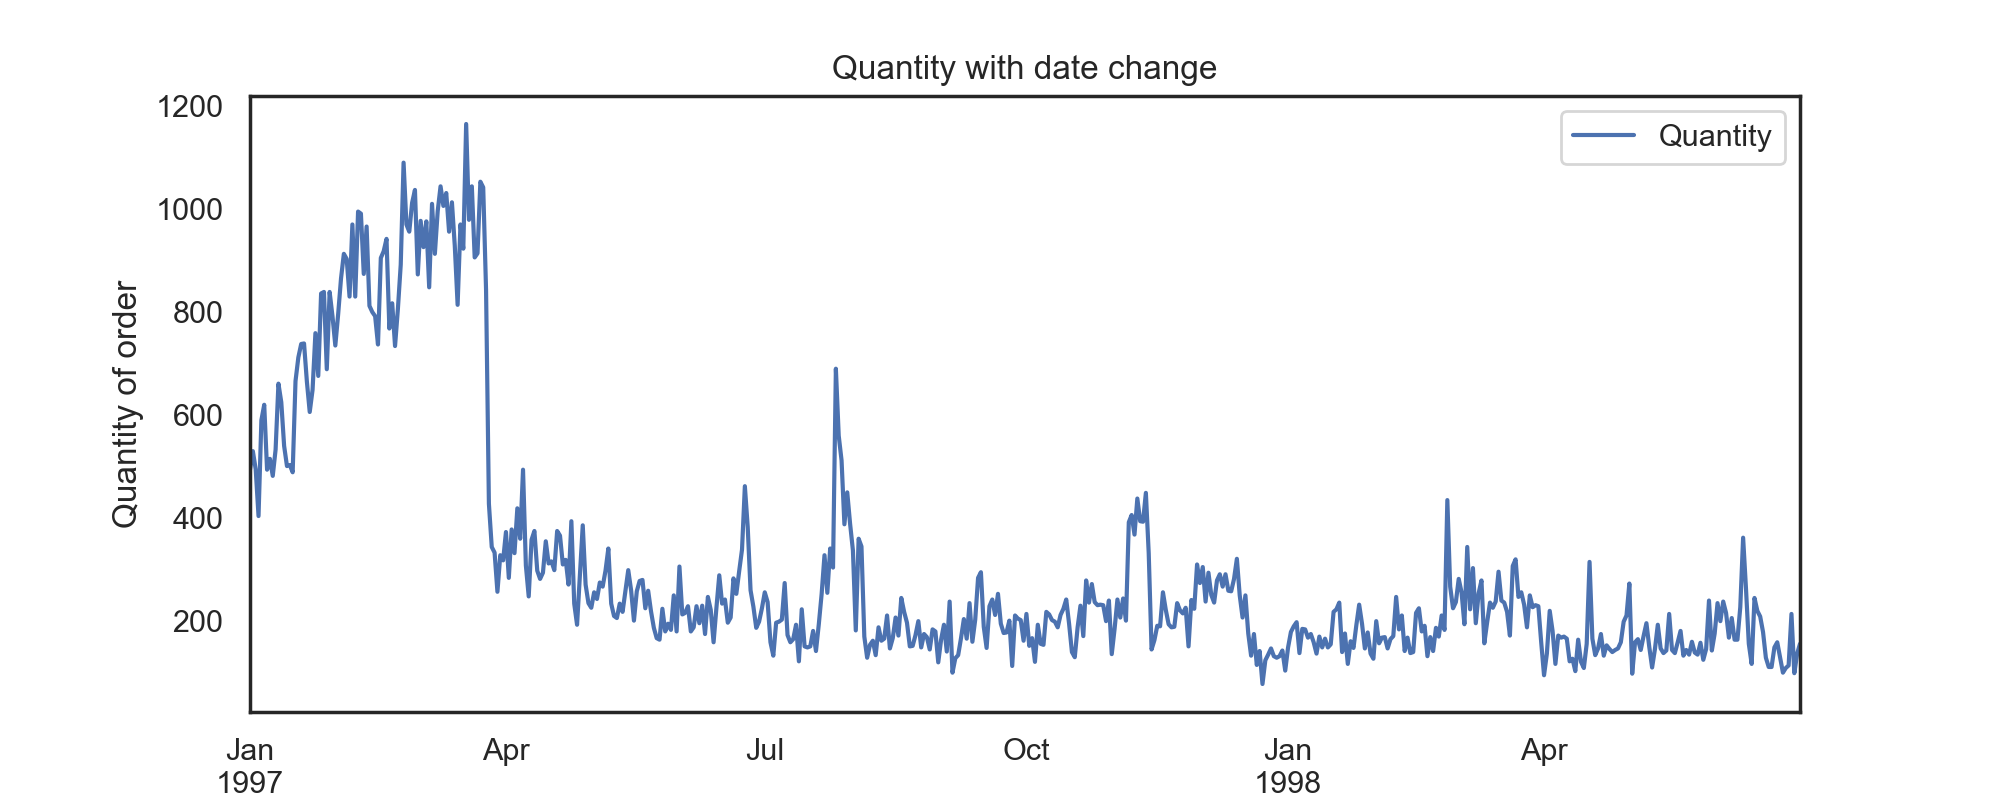

In [53]:
# 可视化
df_quantity.set_index('Order_Date').plot(figsize=(10,4))
plt.title("Quantity with date change")
plt.ylabel("Quantity of order")
plt.show()

分析：

订单数量在 `1997-01 到 1997-04` 总体呈`上升`趋势，且订单数量 `较高`

订单数量在`1997-04`呈峭壁式下滑

之后，订单数量有`小幅度波动`，但基本稳定在`200个/天`

### 3.2.2 订单金额趋势分析

In [54]:
# 数据整合
df_amount = pd.DataFrame(Data.groupby(['Order_Date'])['Amount'].sum())
df_amount = df_amount.reset_index()
df_amount[:10]

,Order_Date,Amount
0,1997-01-01,7515.35
1,1997-01-02,8025.95
2,1997-01-03,7475.04
3,1997-01-04,6722.93
4,1997-01-05,9274.80
5,1997-01-06,9680.55
6,1997-01-07,7741.19
7,1997-01-08,7963.14
8,1997-01-09,7534.92
9,1997-01-10,8348.59


<IPython.core.display.Javascript object>


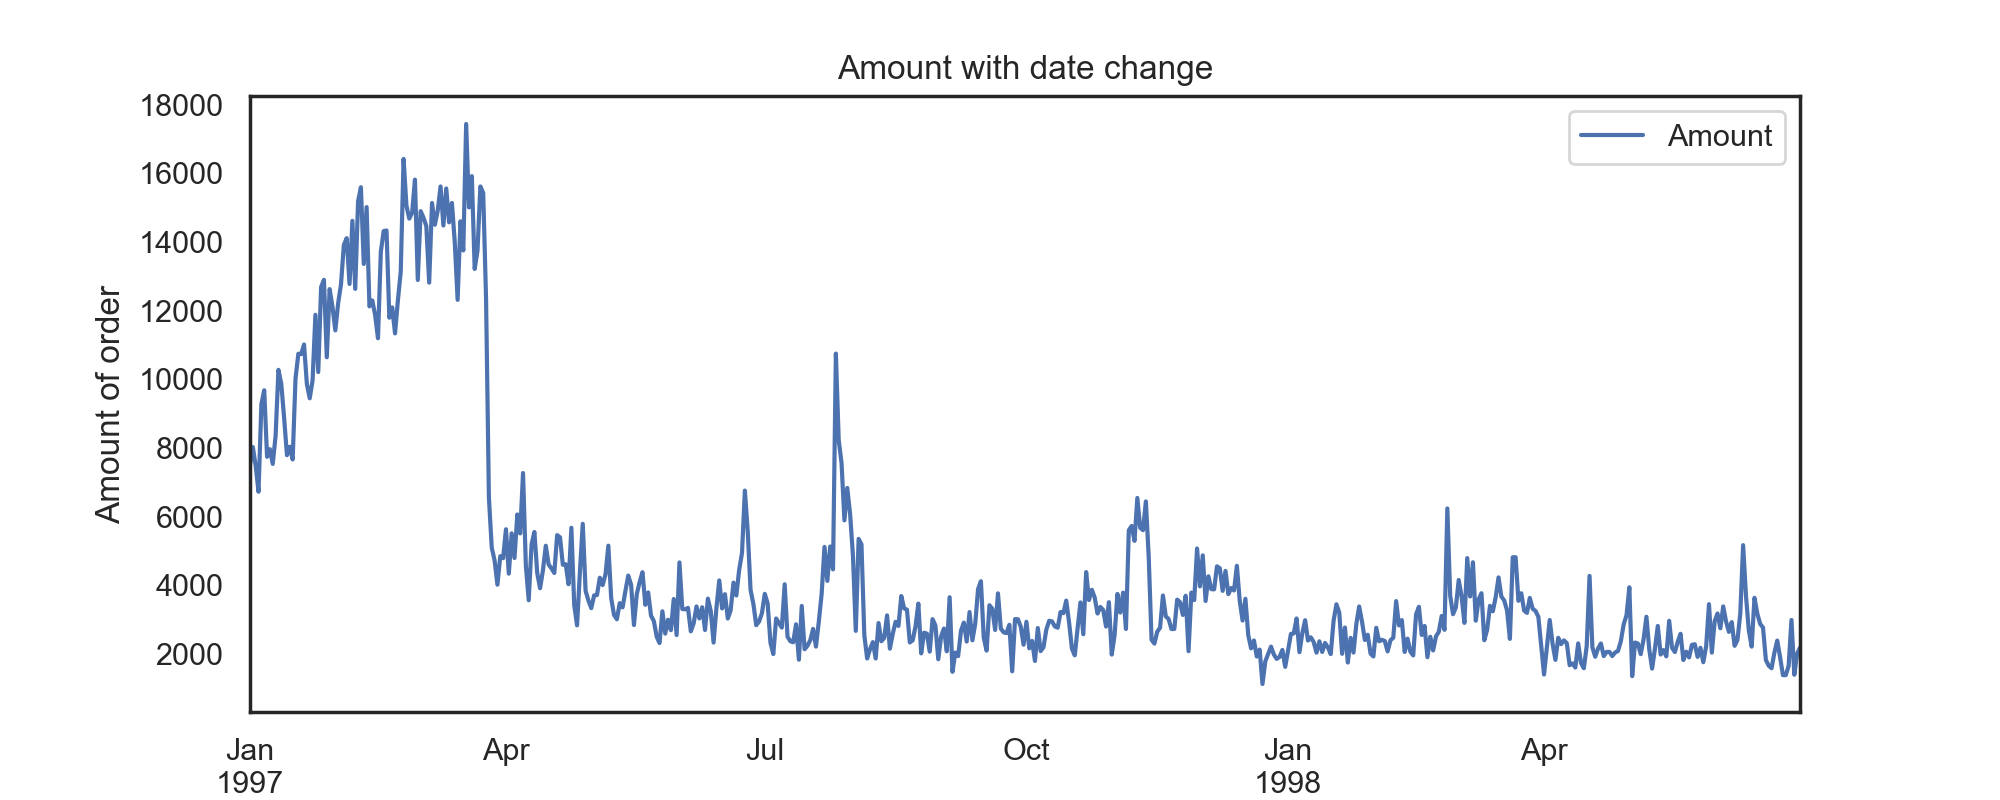

In [55]:
# 可视化
df_amount.set_index('Order_Date').plot(figsize=(10,4))
plt.title("Amount with date change")
plt.ylabel("Amount of order")
plt.show()

分析：

订单金额在 `1997-01 到 1997-04` 总体呈`上升`趋势，订单金额 `较高`

订单金额在`1997-04`呈峭壁式下滑

之后，订单金额有`小幅度波动`，但基本稳定在`4000$/天`